In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [95]:
df=pd.read_csv("clean_with_state_infer.csv")

In [96]:
df

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,lat,long,state,predicted_state,state_comb
0,"abilene, TX",9000,2009,chevrolet,suburban lt2,good,8,gas,217743.0,clean,automatic,rwd,SUV,33.130100,-100.234400,TX,TX,TX
1,"abilene, TX",31999,2012,ram,2500,NaN,0,diesel,NaN,clean,automatic,NaN,NaN,30.648368,-97.862949,TX,TX,TX
2,"abilene, TX",16990,2003,ram,3500,NaN,0,diesel,NaN,clean,manual,NaN,NaN,30.648516,-97.862434,TX,TX,TX
3,"abilene, TX",6000,2002,gmc,sierra 1500,good,8,gas,195000.0,clean,automatic,4wd,pickup,32.444400,-99.992400,TX,TX,TX
4,"abilene, TX",37000,2012,chevrolet,3500,excellent,8,diesel,178000.0,clean,automatic,4wd,pickup,32.781689,-98.942248,TX,TX,TX
5,"abilene, TX",3700,2003,NaN,F150,fair,8,gas,269000.0,clean,automatic,4wd,pickup,32.579641,-99.663505,TX,TX,TX
6,"abilene, TX",19950,2013,ford,f-250,NaN,8,gas,116792.0,clean,automatic,4wd,pickup,32.736030,-97.133644,TX,OK,TX
7,"abilene, TX",19999,2006,ram,2500,NaN,0,diesel,NaN,clean,manual,NaN,NaN,30.647777,-97.862434,TX,TX,TX
8,"abilene, TX",33950,2015,ford,f-350,NaN,8,diesel,77350.0,clean,automatic,4wd,pickup,32.754000,-97.134800,TX,OK,TX
9,"abilene, TX",25950,2015,ford,f-350,NaN,8,gas,121030.0,clean,automatic,4wd,truck,32.736030,-97.133644,TX,OK,TX


# Visualize the Pearson Correlation of the numerical data

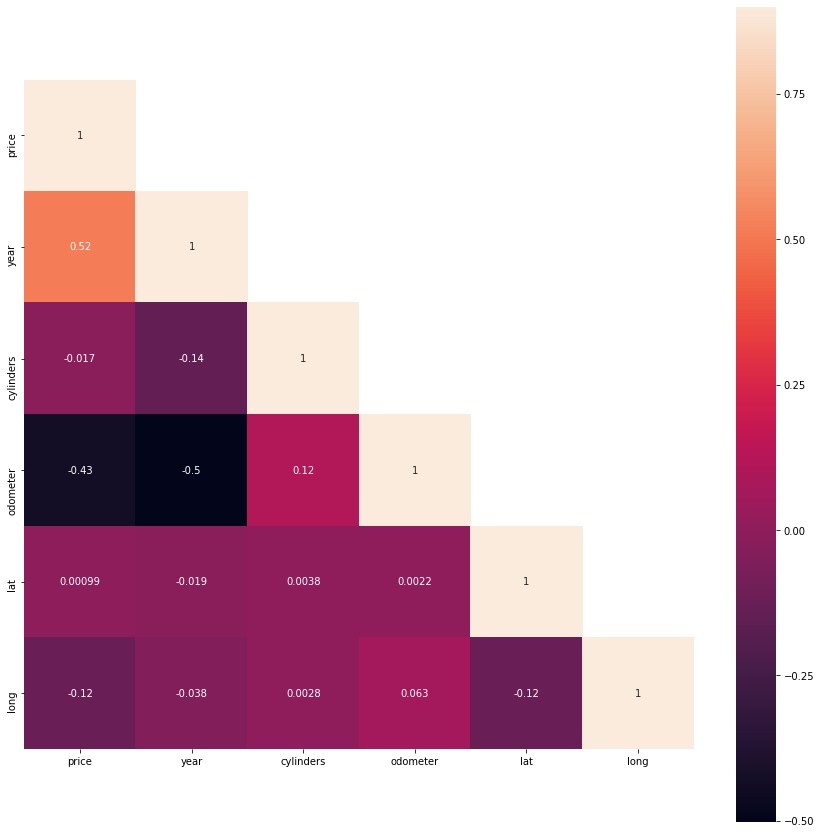

In [13]:
corr = df.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(15,15)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

# Visualize the numerical data with boxplot¶

In [15]:
numerical = ['lat', 'long','odometer','cylinders', 'price']
categorical = ['year','manufacturer','make','condition','cylinders',
               'fuel','title_status','transmission','drive','type','paint_color',
              'county_fips','county_name','state_code', 'state_name', 'city']

In [68]:
df['price'].mean()

13771.685407509598

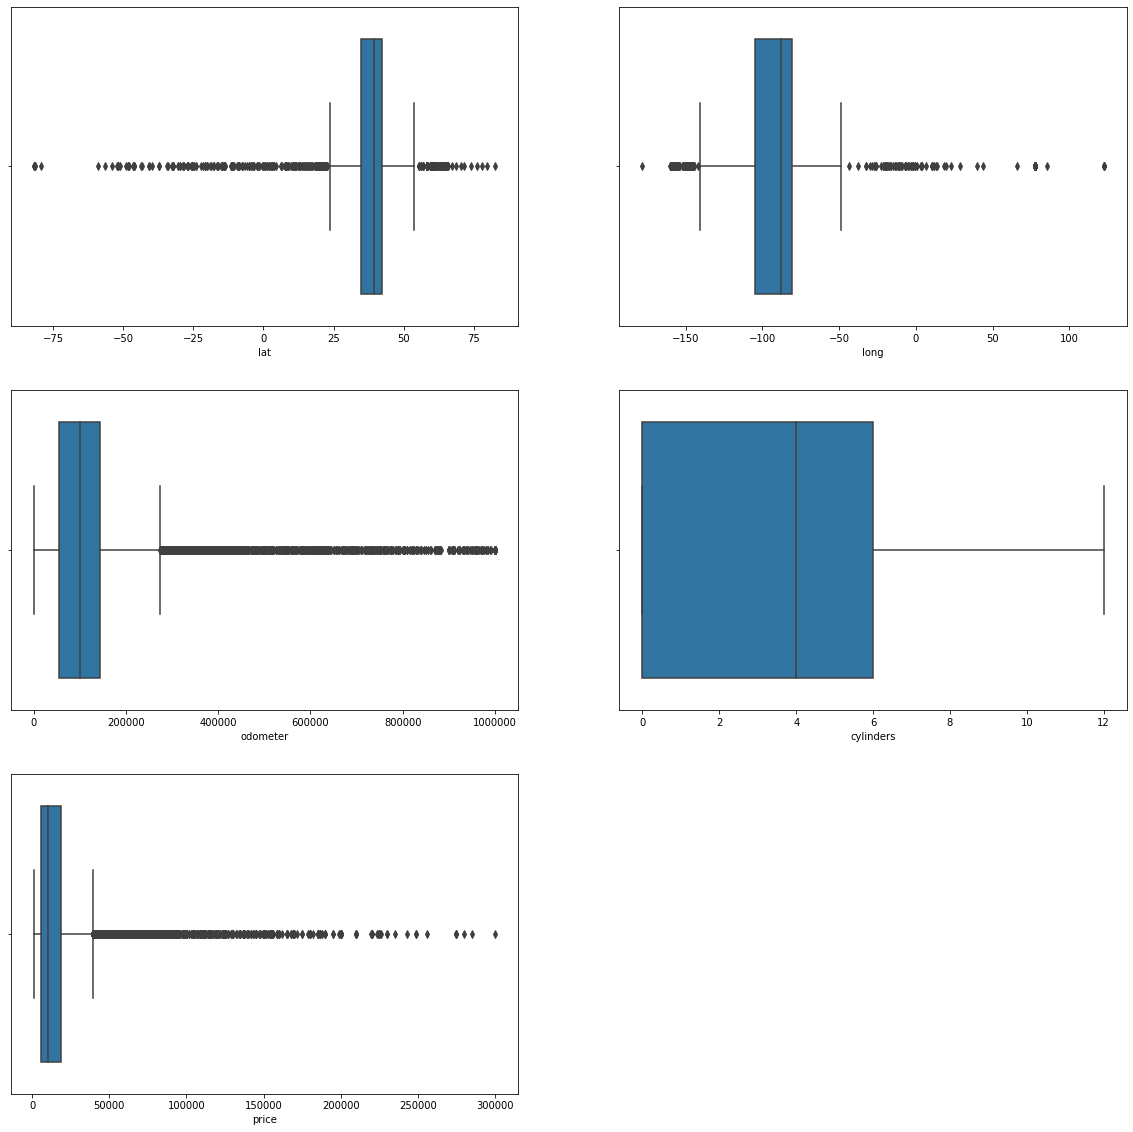

In [86]:
fig = plt.figure(figsize = (20,20))
axes = 320
for num in numerical:
    axes += 1
    fig.add_subplot(axes)
    sns.boxplot(data = df, x = num)
plt.show()

# Visualize yearly production with countplot

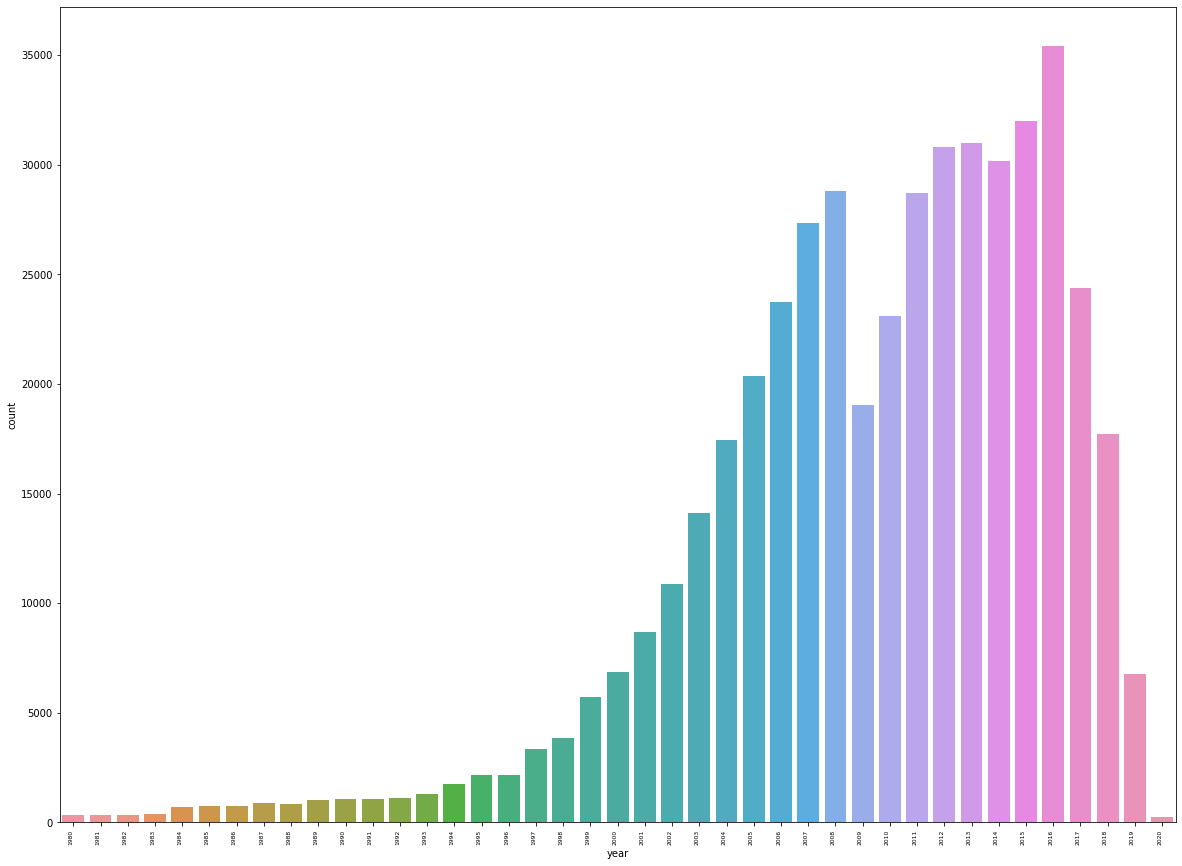

In [28]:
plt.figure(figsize=(20,15))
ax = sns.countplot(x='year',data=df);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=6);

# Visualize original state production with countplot

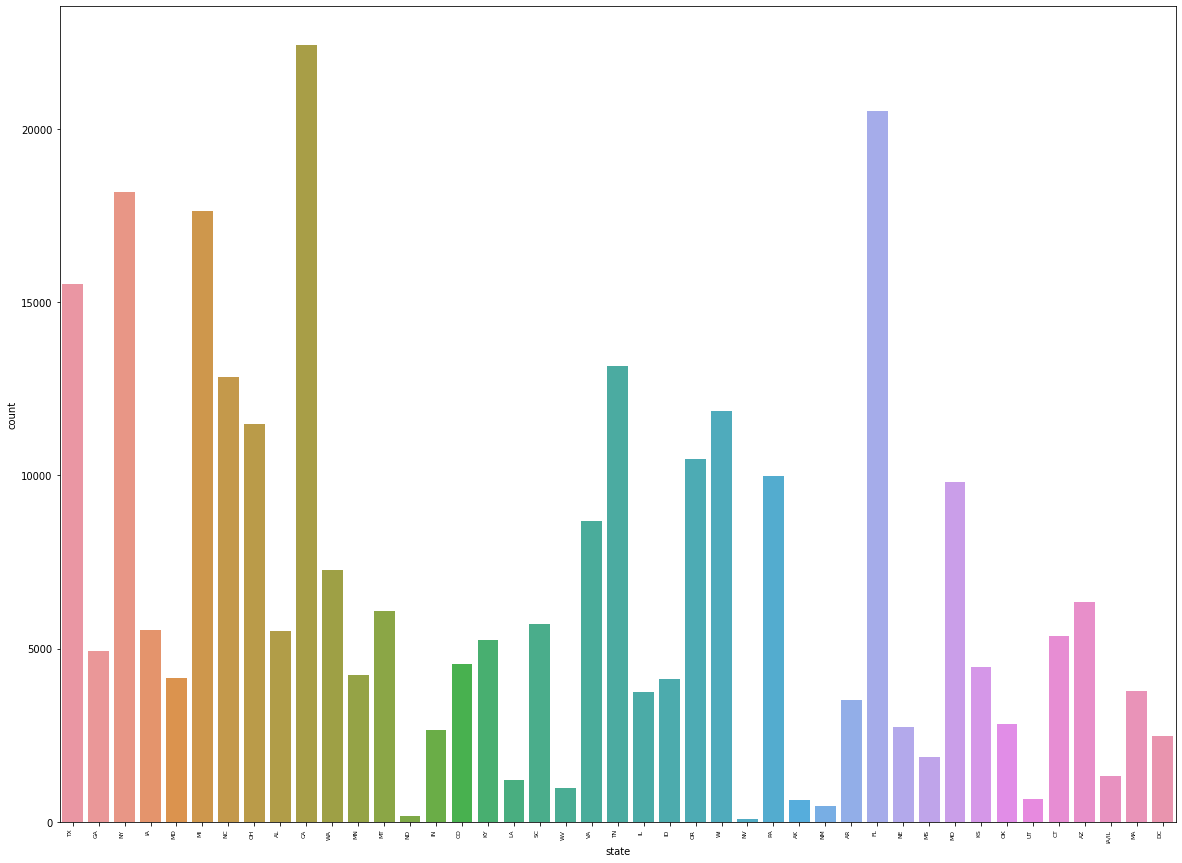

In [29]:
plt.figure(figsize=(20,15))
ax = sns.countplot(x='state',data=df);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=6);

# Visualize combined state production with countplot

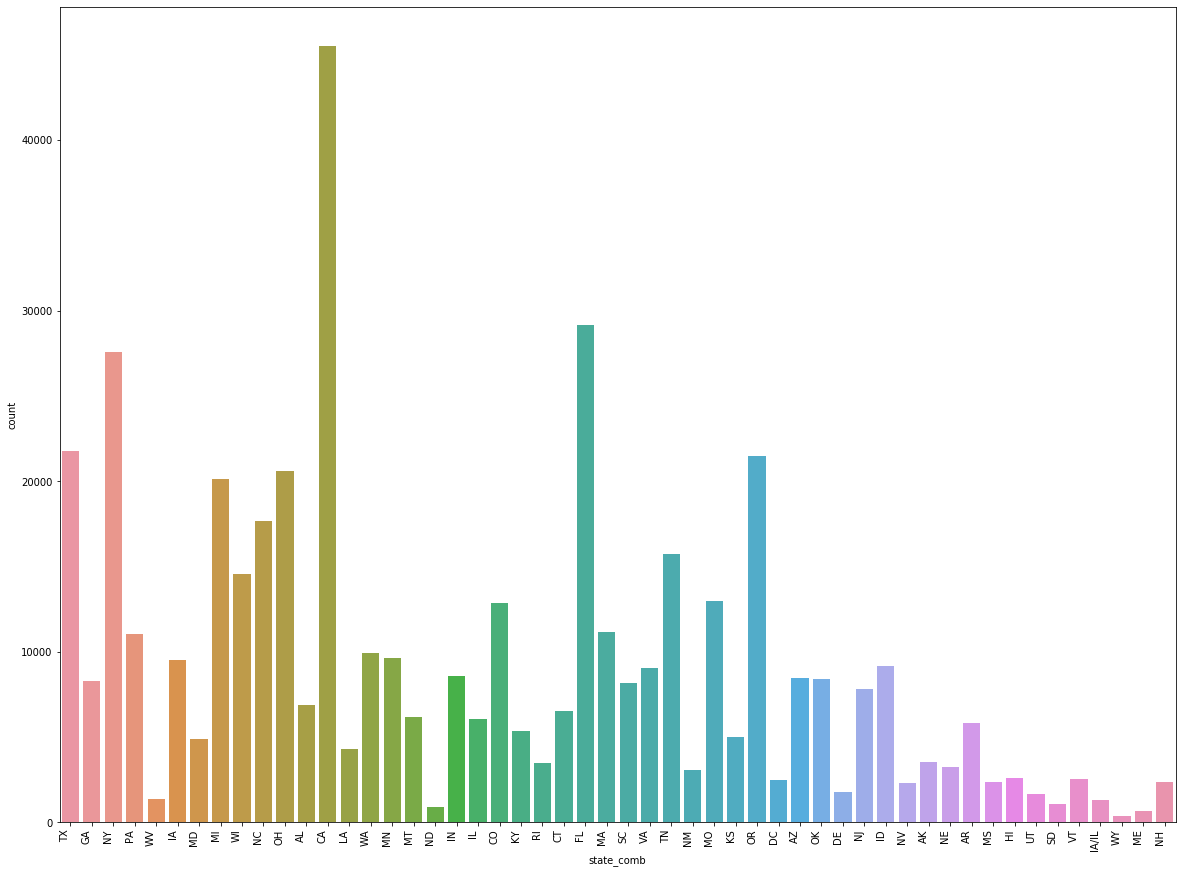

In [37]:
plt.figure(figsize=(20,15))
ax = sns.countplot(x='state_comb',data=df);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10);

# Visualize cylinders with countplot

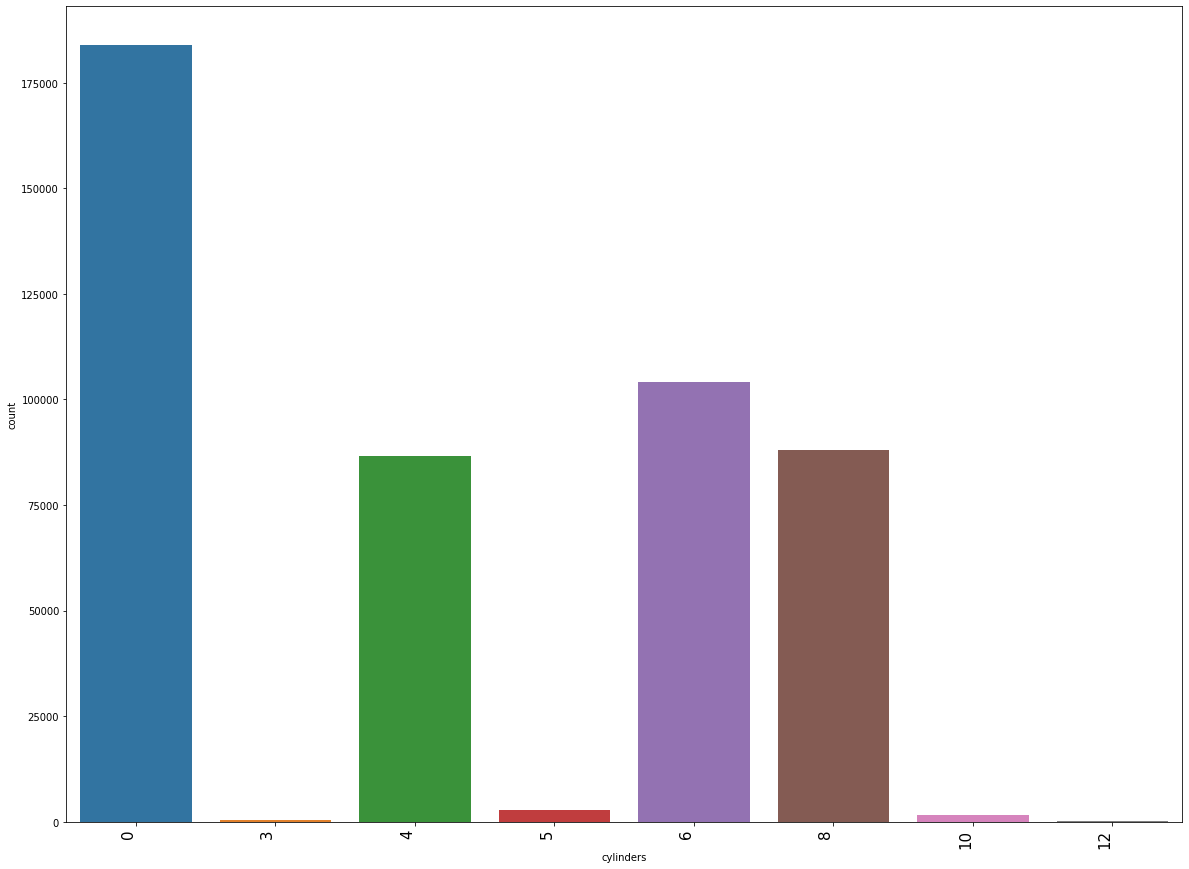

In [73]:
plt.figure(figsize=(20,15))
ax = sns.countplot(x='cylinders',data=df);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=15);

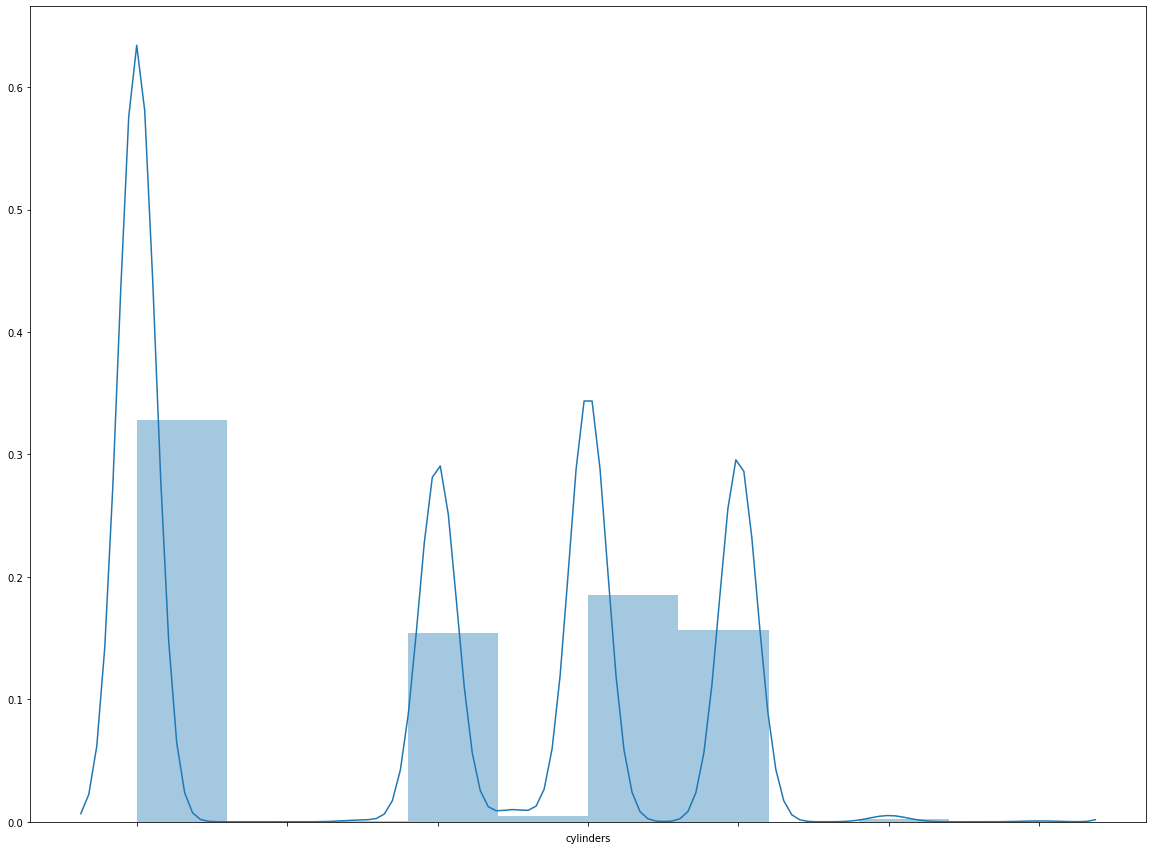

In [75]:
plt.figure(figsize=(20,15))
ax = sns.distplot(df['cylinders'], bins=10, kde=True);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=15);

# Visualize top 10 manufacturers

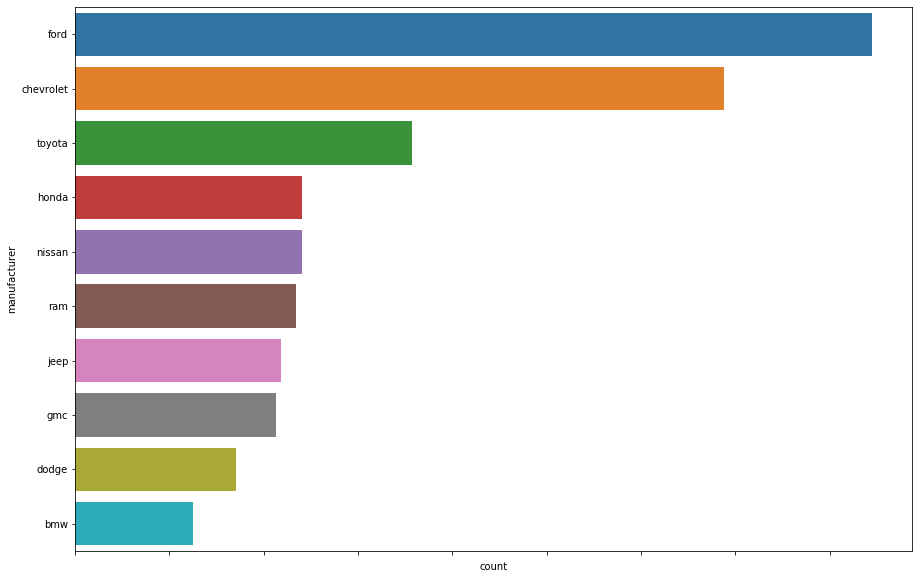

In [24]:
manufacturers_top10 = df['manufacturer'].value_counts().iloc[:10]
manufacturers = pd.DataFrame({'manufacturer': manufacturers_top10.index, 'count': manufacturers_top10.values})
plt.figure(figsize=(15,10))
ax = sns.barplot(y='manufacturer',x='count',data=manufacturers, order=manufacturers['manufacturer']);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=6);

# Scatter Plot

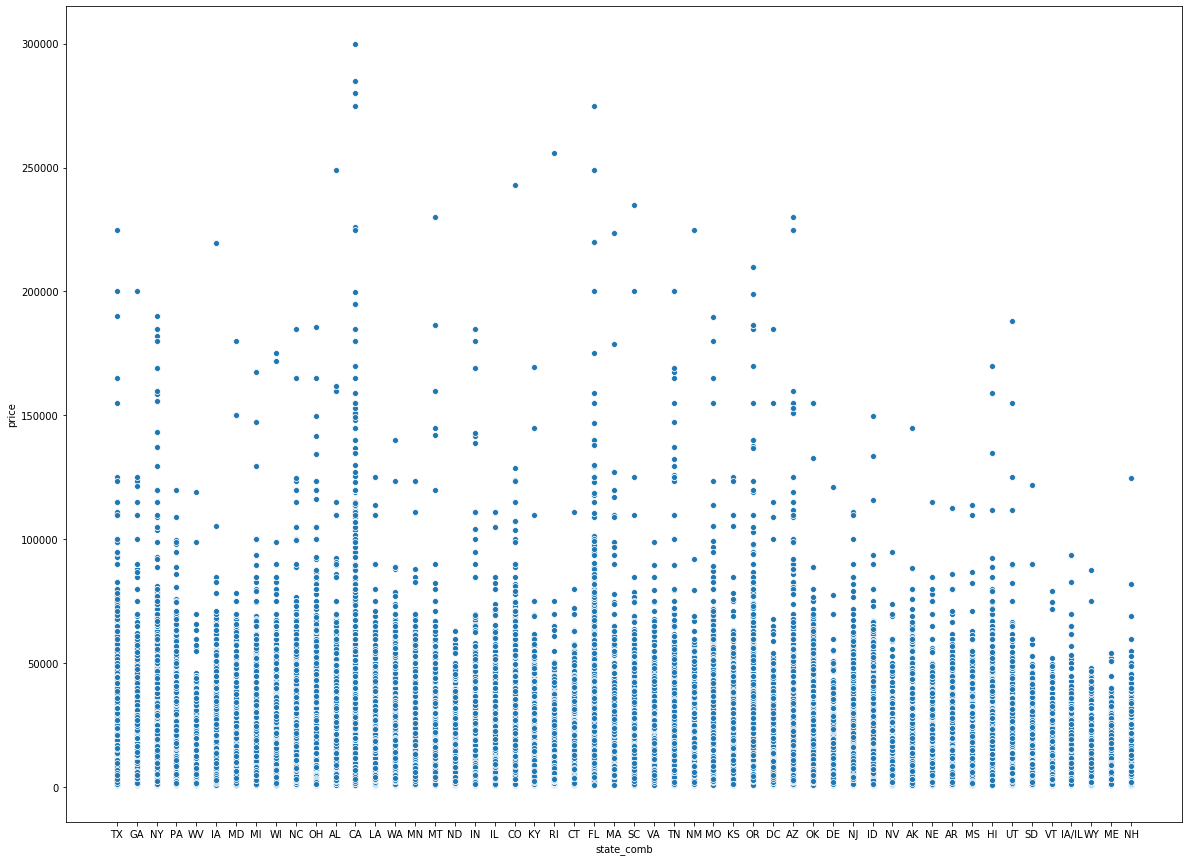

In [85]:
plt.figure(figsize=(20,15))
ax = sns.scatterplot(x='state_comb', y='price', data=df);



# Pie Plot

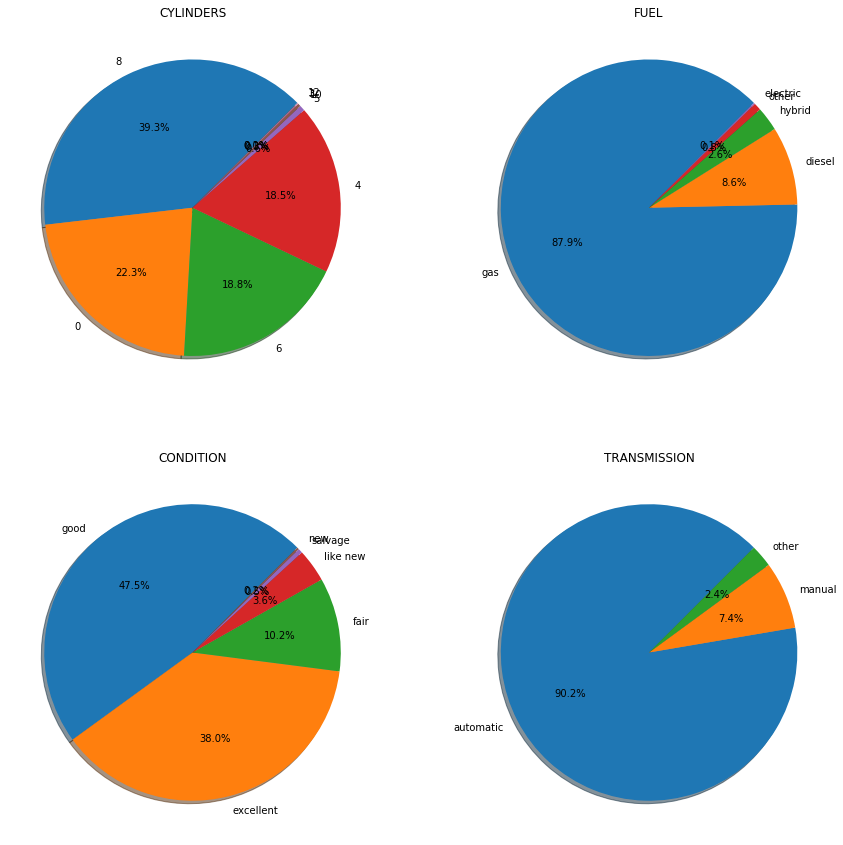

In [100]:
pie = ['cylinders','fuel','condition','transmission']

fig = plt.figure(figsize = (15,15))
axes = 220
for p in pie:
    axes += 1
    fig.add_subplot(axes)
    x=df[p].dropna(axis = 0, how ='any')
    plt.pie(x.value_counts(), labels=x.unique(),autopct='%1.1f%%', shadow=True, startangle=45);
    plt.title(p.upper())
plt.show()

# Pairplot for numerical variables

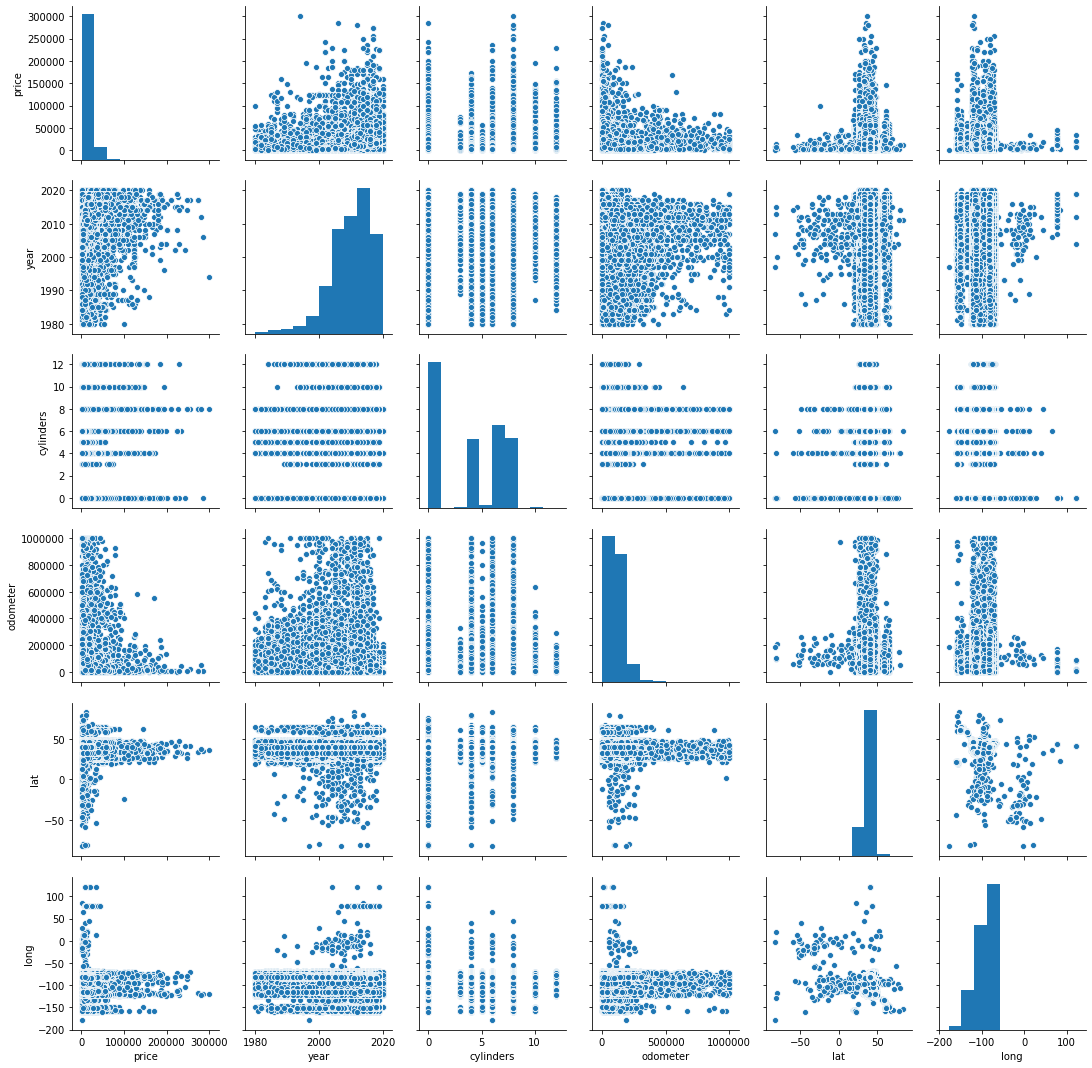

In [49]:
sns.pairplot(df)

# Line Plot

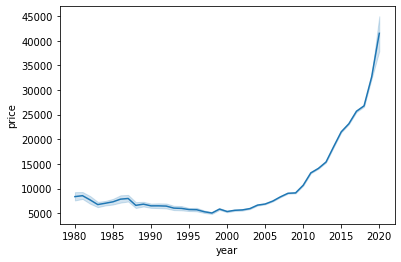

In [65]:
ax = sns.lineplot(x="year", y="price", data=df)